# UEF Analysis of "Q3 ICN 10196 RTGH-S11IS1-0907.SM22014" with raw data and no filling
# Uniform energy factor to energy efficiency for listing
### Do i need to add any other file here ?
### target is what ??
### is target categorical or conitunuous variable ?????
### what factor affecting target to change
### which object column we need to convert to numbers
### which column we can drop from experience from object or numbers


In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe df1 of "Q3 ICN 10196 RTGH-S11IS1-0907.SM22014"
df1 = pd.read_csv("./UEF result/Q3 ICN 10196 RTGH-S11IS1-0907.SM22014.csv")

In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,TimeStamp (sec),Ambient TC,Gas TC,Barometer,Gas ascf,WattHrs,Water (Gallons),Watts,Water Flow (GPM),Tin,...,UEF(1-5-14),UEF(1-5-14-4-6),Mi,Cpi,Tdeltai,Qhwi,Qhw67i,Qhwdi,UEFi,Validity
0,0.000,66.77,66.8,29.907033,0.0,0.002711,0.000000,4.0,0.000000,59.05,...,0.66373,0.830643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Valid
1,0.005,66.77,66.8,29.907033,0.0,0.002711,0.000000,4.0,0.000000,59.05,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Valid
2,1.162,66.77,66.8,29.906879,0.0,0.003745,0.000000,4.0,0.000000,59.05,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Valid
3,3.001,66.77,66.8,29.906419,0.0,0.012700,0.039485,5.0,6.284823,59.05,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Valid
4,6.000,66.77,66.8,29.906726,0.0,0.015833,0.335866,5.0,6.660654,59.15,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Valid


In [4]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeStamp (sec)        6370 non-null   float64
 1   Ambient TC             6370 non-null   float64
 2   Gas TC                 6370 non-null   float64
 3   Barometer              6370 non-null   float64
 4   Gas ascf               6370 non-null   float64
 5   WattHrs                6370 non-null   float64
 6   Water (Gallons)        6370 non-null   float64
 7   Watts                  6370 non-null   float64
 8   Water Flow (GPM)       6370 non-null   float64
 9   Tin                    6370 non-null   float64
 10  Tout                   6370 non-null   float64
 11  Tank Outlet            6370 non-null   float64
 12  Purge Valve            6370 non-null   float64
 13  Drain Valve            6370 non-null   float64
 14  Drawn Water (Gallons)  6370 non-null   float64
 15  Stat

In [5]:
df1.columns

Index(['TimeStamp (sec)', 'Ambient TC', 'Gas TC', 'Barometer', 'Gas ascf',
       'WattHrs', 'Water (Gallons)', 'Watts', 'Water Flow (GPM)', 'Tin',
       'Tout', 'Tank Outlet', 'Purge Valve', 'Drain Valve',
       'Drawn Water (Gallons)', 'Station', 'Unit Name', 'Model', 'Iteration',
       'TimeStamp (hrs)', 'Purge no', 'Purge', 'Draw no', 'Draw', 'Cut no',
       'Cut', 'Waiting for T', 'Gas Pressure', 'Correction Factor (1)',
       'Correction Factor', 'High Heating Value', 'Qr', 'Qe', 'Qf',
       'Mass Water', 'M1', 'Tdelta1', 'Cp1', 'Recovery Efficiency', 'Cp(1)',
       'Cp(2)', 'Cp(3)', 'Cp(4)', 'Cp(5)', 'Cp(6)', 'Cp(7)', 'Cp(8)', 'Cp(9)',
       'Cp(10)', 'Cp(11)', 'Cp(12)', 'Cp(13)', 'Cp(14)', 'Qhwd', 'Qd', 'Qdm',
       'UEF', 'UEF(1-5-14)', 'UEF(1-5-14-4-6)', 'Mi', 'Cpi', 'Tdeltai', 'Qhwi',
       'Qhw67i', 'Qhwdi', 'UEFi', 'Validity'],
      dtype='object')

In [6]:
df2 = df1.iloc[:, 0:18]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeStamp (sec)        6370 non-null   float64
 1   Ambient TC             6370 non-null   float64
 2   Gas TC                 6370 non-null   float64
 3   Barometer              6370 non-null   float64
 4   Gas ascf               6370 non-null   float64
 5   WattHrs                6370 non-null   float64
 6   Water (Gallons)        6370 non-null   float64
 7   Watts                  6370 non-null   float64
 8   Water Flow (GPM)       6370 non-null   float64
 9   Tin                    6370 non-null   float64
 10  Tout                   6370 non-null   float64
 11  Tank Outlet            6370 non-null   float64
 12  Purge Valve            6370 non-null   float64
 13  Drain Valve            6370 non-null   float64
 14  Drawn Water (Gallons)  6370 non-null   float64
 15  Stat

In [ ]:
# can we drop columns 27 to 58 ? yes i can drop all 

#after 14, no need to keep any field

# what is important or what ?

# Station           Unit Name          Model  anything important here ?

# Purge    Draw    cut ?

#what is target variable ?

In [ ]:
#df1['Date/Time'].head()

In [ ]:
#df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

In [ ]:
#df1['Date/Time'].head()

In [ ]:
#df1.head()

In [ ]:
#df1 = df1.drop(['WHTRSETP', "Station", "MODEL_ID"], axis=1)
#df1.info()

In [7]:
df2.shape

(6370, 18)

In [8]:
#checking null values
df2.isnull().sum()

TimeStamp (sec)          0
Ambient TC               0
Gas TC                   0
Barometer                0
Gas ascf                 0
WattHrs                  0
Water (Gallons)          0
Watts                    0
Water Flow (GPM)         0
Tin                      0
Tout                     0
Tank Outlet              0
Purge Valve              0
Drain Valve              0
Drawn Water (Gallons)    0
Station                  0
Unit Name                0
Model                    0
dtype: int64

In [ ]:
#df1.dropna(how='all')

In [ ]:
#df1.head()

In [ ]:
#df1.info()

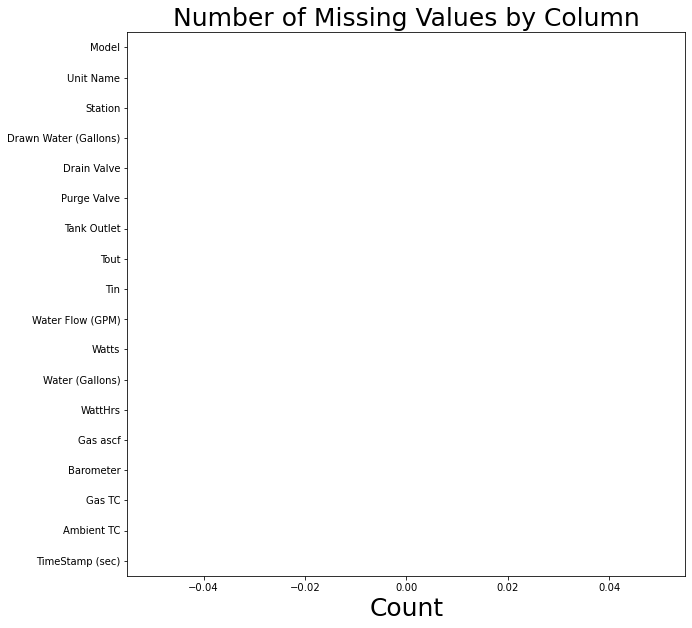

In [9]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (10,10))

df2.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

In [ ]:
# selecting the most filled fields and droping most empty fieds

<AxesSubplot:>

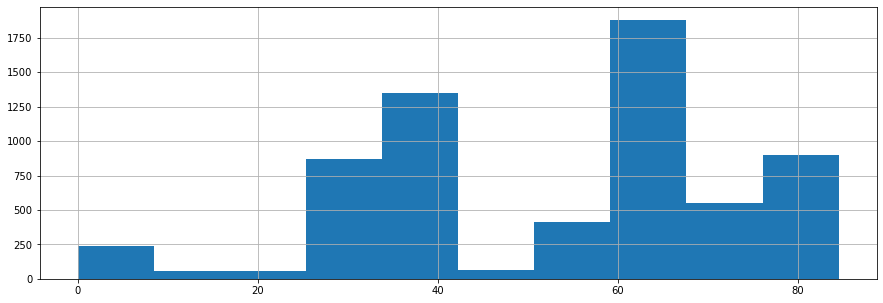

In [10]:
plt.figure(figsize=(15, 5))
df2['Drawn Water (Gallons)'].hist()

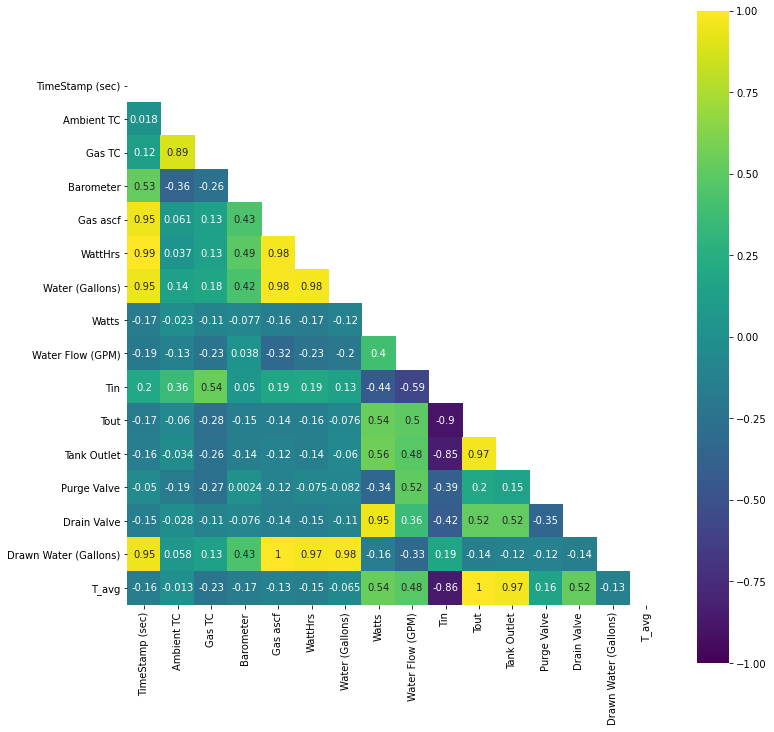

In [16]:
#visual of correlation between fields or columns
plt.figure(figsize=(12, 12))
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);

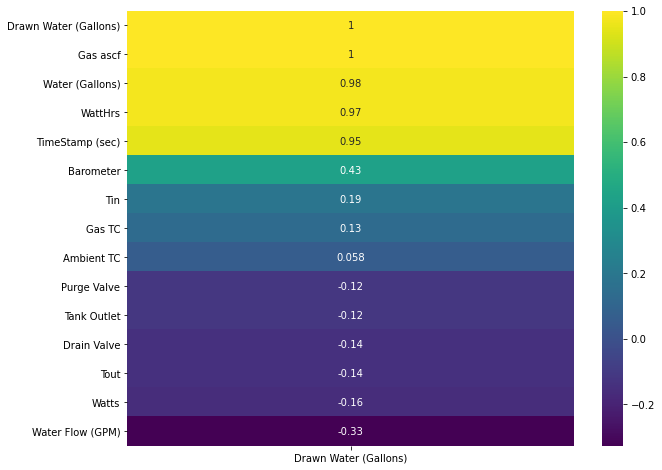

In [12]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df2.corr()[['Drawn Water (Gallons)']].sort_values('Drawn Water (Gallons)', ascending=False), annot=True, cmap='viridis');

In [ ]:
#I need to check for  CP is (Tin+Tout)/2 average temperature

# and then correlation of this field with all other????

In [13]:
df2 ['T_avg'] = (df2['Tin'] + df2['Tout'])/2
df3 = df2
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeStamp (sec)        6370 non-null   float64
 1   Ambient TC             6370 non-null   float64
 2   Gas TC                 6370 non-null   float64
 3   Barometer              6370 non-null   float64
 4   Gas ascf               6370 non-null   float64
 5   WattHrs                6370 non-null   float64
 6   Water (Gallons)        6370 non-null   float64
 7   Watts                  6370 non-null   float64
 8   Water Flow (GPM)       6370 non-null   float64
 9   Tin                    6370 non-null   float64
 10  Tout                   6370 non-null   float64
 11  Tank Outlet            6370 non-null   float64
 12  Purge Valve            6370 non-null   float64
 13  Drain Valve            6370 non-null   float64
 14  Drawn Water (Gallons)  6370 non-null   float64
 15  Stat

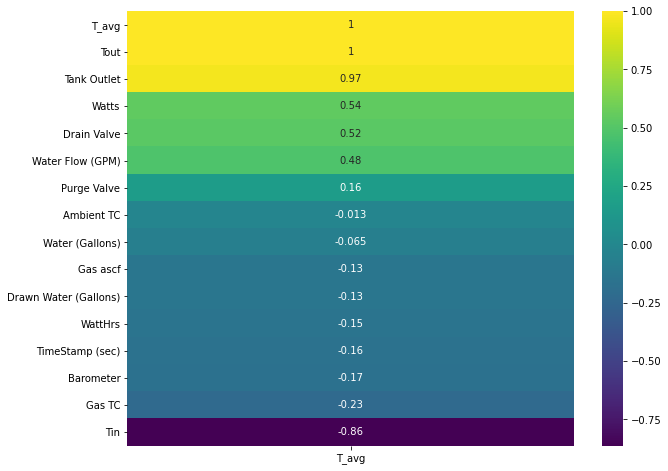

In [14]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df3.corr()[['T_avg']].sort_values('T_avg', ascending=False), annot=True, cmap='viridis');

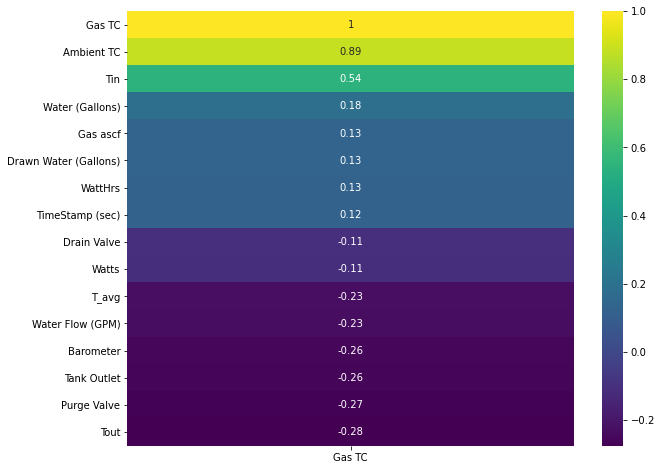

In [15]:
#'Gas TC'
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df3.corr()[['Gas TC']].sort_values('Gas TC', ascending=False), annot=True, cmap='viridis');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='FLAMECUR');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='AND2CURR');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
#df1.plot(kind='scatter', x = 'CHE_FIGN', y='WHTRSETP');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='Date/Time');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df1.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_SIGN');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and T_HEALTH
df1.plot(kind='scatter', x = 'CHE_FIGN', y='T_HEALTH');

In [ ]:
df1['T_HEALTH'].hist()

In [ ]:
#Scatter plot to see relation between CHE_FIGN and C_HEALTH
df1.plot(kind='scatter', x = 'CHE_FIGN', y='C_HEALTH');

In [ ]:
df1['C_HEALTH'].hist()

In [ ]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df1.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_BMIN');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df1.plot(kind='scatter', x = 'CHE_FIGN', y='AND2CURR');

In [ ]:
#selct and drop any columns
# features = ['column1', 'column2']
#df1_columns = df1[features]
#df1_final = df_final['CHE_FIGN']
#df1_final = df_final.drop(columns=['CHE_FIGN', 'CHE_FIGN'])

In [ ]:
#creating dataframe df2 of "NL I10"
df2 = pd.read_csv("./clean-anes/NL I10.csv")

In [ ]:
#readong first 5 rows of "NL I10"
df2.head()

In [ ]:
# looking at null values and data types of each column for "NL I09"
df2.info()